<a href="https://colab.research.google.com/github/rfb0408/python_data_analyst_study/blob/main/%EA%B3%B5%EA%B3%B5%EB%8D%B0%EC%9D%B4%ED%84%B0_%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##1. 미세먼저 데이터

*   xml API는 url에 key와 여러 파라미터를 보내면 응답
*   url에 key와 여러 파라미터를 보내기위한 request 모듈을 사용

In [ ]:
import requests #requests는 Python 용 HTTP 라이브러리

1) 요청할 파라미터 정의하기

*  https://www.airkorea.or.kr/web/stationInfo?pMENU_NO=93





In [ ]:
# 1.url 정의
url = 'http://apis.data.go.kr/B552584/ArpltnInforInqireSvc/getMsrstnAcctoRltmMesureDnsty'

# 2.api 저장 / api는 요청을 보낸사람이 누군지 혹은 요청의 횟수를 제어하기위해 key 할당
key= 'ELannNWGiokSC4X1EsqzgU/JErF4DMgn2o9gBBvkwuXNtFh5J/96zitRsotsDBakuKK6ydhlDpz9xDqjDxg2jA=='

# 3.요청변수 정의
p ={'serviceKey' :key ,'returnType' : 'xml','numOfRows': '100',
    'pageNo' : '1','stationName': '청라',
    'dataTerm' : 'DAILY','ver':'1.1' }

2) 데이터 가져오기

In [ ]:
# get : 요청, 값을 가져오는 역할
response = requests.get(url,params=p)

# status_code : 통신 상태 확인 200번대: 정상, 400번대: 존재하지 않는 페이지, 500번대: 제한
response.status_code

#encoding 상태 확인,'유니코드'인지 '아스키'인지 확인
print(response.apparent_encoding)

ascii


In [ ]:
data = str(response.content,"ascii") # 문자열로 바꿔줘야함. 왜냐하면 parsing(쪼개는 작업)을 해야 데이터에 접근해서 작업이 가능!
print(data)

In [ ]:
type(data) # 문자열로 바뀐 것 확인!

str

3) xml 데이터 피싱

In [ ]:
# xml parser 모듈 가져오기. xml 데이터를 파싱하고 생성하고 수정하는 기능을 제공
import xml.etree.ElementTree as ET

In [ ]:
# 문자열 데이터 이므로 fromstring 함수(xml 문자열을 파싱해서 element객체를 반환)를 이용해서 parsing
tree = ET.fromstring(data)
tree

<Element 'response' at 0x79d045b311c0>

In [ ]:
list(tree) #[<Element 'header' at 메모리>, <Element 'body' at 메모리>]로 "header"와 "body"임을 이루어 졌음을 알 수 있음.

[<Element 'header' at 0x79d045b31210>, <Element 'body' at 0x79d045b31350>]

In [ ]:
len(tree[1])

4

In [ ]:
list(tree[1])

[<Element 'items' at 0x79d045b31440>,
 <Element 'numOfRows' at 0x79d045b64900>,
 <Element 'pageNo' at 0x79d045b64950>,
 <Element 'totalCount' at 0x79d045b649a0>]

In [ ]:
len(tree[1][0]) # 하루치 데이터라서 23개 있음

23

In [ ]:
list(tree[1][0])

[<Element 'item' at 0x79d045b31490>,
 <Element 'item' at 0x79d045b31c60>,
 <Element 'item' at 0x79d045b32430>,
 <Element 'item' at 0x79d045b32c00>,
 <Element 'item' at 0x79d045b333d0>,
 <Element 'item' at 0x79d045b33ba0>,
 <Element 'item' at 0x79d045b443b0>,
 <Element 'item' at 0x79d045b44b80>,
 <Element 'item' at 0x79d045b45350>,
 <Element 'item' at 0x79d045b45b20>,
 <Element 'item' at 0x79d045b462f0>,
 <Element 'item' at 0x79d045b46ac0>,
 <Element 'item' at 0x79d045b47290>,
 <Element 'item' at 0x79d045b47a60>,
 <Element 'item' at 0x79d045b50270>,
 <Element 'item' at 0x79d045b50a40>,
 <Element 'item' at 0x79d045b51210>,
 <Element 'item' at 0x79d045b519e0>,
 <Element 'item' at 0x79d045b521b0>,
 <Element 'item' at 0x79d045b52980>,
 <Element 'item' at 0x79d045b53150>,
 <Element 'item' at 0x79d045b53920>,
 <Element 'item' at 0x79d045b64130>]

In [ ]:
len(tree[1][0][0])

23

In [ ]:
list(tree[1][0][0])

[<Element 'so2Grade' at 0x79d045b314e0>,
 <Element 'coFlag' at 0x79d045b31530>,
 <Element 'pm10Value24' at 0x79d045b31580>,
 <Element 'khaiValue' at 0x79d045b315d0>,
 <Element 'so2Value' at 0x79d045b31620>,
 <Element 'coValue' at 0x79d045b31670>,
 <Element 'pm25Flag' at 0x79d045b316c0>,
 <Element 'pm10Flag' at 0x79d045b31710>,
 <Element 'pm10Value' at 0x79d045b31760>,
 <Element 'o3Grade' at 0x79d045b317b0>,
 <Element 'khaiGrade' at 0x79d045b31800>,
 <Element 'pm25Value' at 0x79d045b31850>,
 <Element 'pm25Value24' at 0x79d045b318a0>,
 <Element 'no2Flag' at 0x79d045b318f0>,
 <Element 'no2Grade' at 0x79d045b31940>,
 <Element 'o3Flag' at 0x79d045b31990>,
 <Element 'pm25Grade' at 0x79d045b319e0>,
 <Element 'so2Flag' at 0x79d045b31a30>,
 <Element 'dataTime' at 0x79d045b31a80>,
 <Element 'coGrade' at 0x79d045b31b20>,
 <Element 'no2Value' at 0x79d045b31b70>,
 <Element 'pm10Grade' at 0x79d045b31bc0>,
 <Element 'o3Value' at 0x79d045b31c10>]

4) 데이터 가공하기

In [ ]:
new_data = tree[1][0][0]

print(len(new_data))
print(new_data)

23
<Element 'item' at 0x79d045b31490>


In [ ]:
for i in range(23):
  print(new_data[i].tag,new_data[i].text, i)

so2Grade 1 0
coFlag None 1
pm10Value24 40 2
khaiValue 100 3
so2Value 0.003 4
coValue 0.8 5
pm25Flag None 6
pm10Flag None 7
pm10Value 35 8
o3Grade 1 9
khaiGrade 2 10
pm25Value 33 11
pm25Value24 35 12
no2Flag None 13
no2Grade 2 14
o3Flag None 15
pm25Grade 2 16
so2Flag None 17
dataTime 2023-12-30 18:00 18
coGrade 1 19
no2Value 0.051 20
pm10Grade 2 21
o3Value 0.007 22


In [ ]:
index_2=[16,21]

p_data = {} # 미세먼지 확인용

for i in index_2:
    p_data[new_data[i].tag] = new_data[i].text

In [ ]:
print(p_data)

{'pm25Grade': '2', 'pm10Grade': '2'}


In [ ]:
#1 미세먼지 상태 판별
if p_data["pm10Grade"]== "1":
  state_pm10 = "좋음"
elif p_data["pm10Grade"] == "2":
  state_pm10 = "보통"
elif p_data["pm10Grade"] == "3":
  state_pm10 = "나쁨"
else:
  state_pm10 = "매우 나쁨"
##################
if p_data["pm25Grade"] == "1":
  state_pm25 = "좋음"
elif p_data["pm25Grade"] == "2":
  state_pm25 = "보통"
elif p_data["pm25Grade"] == "3":
  state_pm25 = "나쁨"
else:
  state_pm25 = "매우 나쁨"

state_pm10, state_pm25

('보통', '보통')

In [ ]:
answer = str(new_data[18].text + "의 미세먼지 수준은 " + state_pm10 +
             " 초 미세먼지 수준은 " + state_pm25 + "입니다."  )
answer

'2023-12-30 18:00의 미세먼지 수준은 보통 초 미세먼지 수준은 보통입니다.'

##2. 음성 생성하기

In [ ]:
! pip install gTTS #할 때마다 실행해야됨. PC에 설치하는게 아님

In [ ]:
from gtts import gTTS

In [ ]:
tts = gTTS(text=answer,lang='ko')
tts.save("answer.mp3")

위 코드까지 실행하고 좌측 폴더 아이콘을 누르면 answer.mp3 가 생성된 것을 볼 수 있다.

##3. 상관 분석

In [ ]:
# 3개월치 분석 ,numofRows는 3000으로 바꾸고 dataTerm는 3MONTH 바꿔주었다.
url = 'http://apis.data.go.kr/B552584/ArpltnInforInqireSvc/getMsrstnAcctoRltmMesureDnsty'

key= 'ELannNWGiokSC4X1EsqzgU/JErF4DMgn2o9gBBvkwuXNtFh5J/96zitRsotsDBakuKK6ydhlDpz9xDqjDxg2jA=='

p ={'serviceKey' :key ,'returnType' : 'xml','numOfRows': '3000',
    'pageNo' : '1','stationName': '청라',
    'dataTerm' : '3MONTH','ver':'1.1' }

In [ ]:
response = requests.get(url,params=p)

print(response.apparent_encoding)

utf-8


In [ ]:
data = str(response.content,"utf-8")
print(len(data))

1565215


In [ ]:
tree = ET.fromstring(data)
list(tree[1][0][0])

new_data = tree[1][0][0]

for i in range(23):
  print(new_data[i].tag,new_data[i].text, i)

In [ ]:
index = [3,4,5,8,11,18,20,22]

khai = []
so2 = []
co2 = []
pm10 = []
pm25 = []
date = []
no2 = []
o3 = []

#순서대로 body, items
regdata = tree[1][0]
print(len(regdata))
#6 데이터 확인
for i in tree[1][0]:
    print("date :",i[18].text, "pm25 :",i[11].text, "pm10 :",
          i[8].text ,"no2 :", i[20].text, "o3 :", i[22].text, "khai :",
          i[3].text, "so2 :", i[4].text, "co2 :", i[5].text )

2183
date : 2023-12-30 20:00 pm25 : 34 pm10 : 42 no2 : 0.049 o3 : 0.007 khai : 95 so2 : 0.003 co2 : 0.8
date : 2023-12-30 19:00 pm25 : 31 pm10 : 37 no2 : 0.051 o3 : 0.007 khai : 95 so2 : 0.003 co2 : 0.8
date : 2023-12-30 18:00 pm25 : 33 pm10 : 35 no2 : 0.051 o3 : 0.007 khai : 100 so2 : 0.003 co2 : 0.8
date : 2023-12-30 17:00 pm25 : 34 pm10 : 35 no2 : 0.050 o3 : 0.011 khai : 100 so2 : 0.003 co2 : 0.7
date : 2023-12-30 16:00 pm25 : 34 pm10 : 38 no2 : 0.050 o3 : 0.013 khai : 100 so2 : 0.003 co2 : 0.7
date : 2023-12-30 15:00 pm25 : 38 pm10 : 39 no2 : 0.048 o3 : 0.010 khai : 100 so2 : 0.003 co2 : 0.8
date : 2023-12-30 14:00 pm25 : 40 pm10 : 42 no2 : 0.044 o3 : 0.011 khai : 100 so2 : 0.003 co2 : 0.8
date : 2023-12-30 13:00 pm25 : 41 pm10 : 43 no2 : 0.041 o3 : 0.012 khai : 101 so2 : 0.003 co2 : 0.8
date : 2023-12-30 12:00 pm25 : 43 pm10 : 50 no2 : 0.043 o3 : 0.011 khai : 100 so2 : 0.003 co2 : 0.8
date : 2023-12-30 11:00 pm25 : 42 pm10 : 45 no2 : 0.045 o3 : 0.009 khai : 100 so2 : 0.003 co2 : 0

In [ ]:
#7 데이터 추출
for i in tree[1][0]:
    print("date :",i[18].text, "pm25 :",i[11].text, "pm10 :",
          i[8].text ,"no2 :", i[20].text, "o3 :", i[22].text, "khai :",
          i[3].text, "so2 :", i[4].text, "co2 :", i[5].text )

    if (i[3].text == "-")or(i[4].text == "-")or(i[5].text == "-")or(i[8].text == "-") or (i[11].text == "-") or (i[18].text == "-")or (i[20].text == "-") or (i[22].text == "-"):
       pass

    else :
        date.append(i[18].text)
        khai.append(float(i[3].text))
        so2.append(float(i[4].text))
        co2.append(float(i[5].text))
        pm25.append(int(i[11].text))
        pm10.append(int(i[8].text))
        no2.append(float(i[20].text))
        o3.append(float(i[22].text))

print(len(date), len(khai),len(so2),len(co2),len(pm10), len(pm25), len(no2), len(o3)) #pandas를 이용해서 데이터 프레임을 만들 때, 그 데이터 프레임의 갯수가 다 같아야 오류가 나지 않는다.

date : 2023-12-30 20:00 pm25 : 34 pm10 : 42 no2 : 0.049 o3 : 0.007 khai : 95 so2 : 0.003 co2 : 0.8
date : 2023-12-30 19:00 pm25 : 31 pm10 : 37 no2 : 0.051 o3 : 0.007 khai : 95 so2 : 0.003 co2 : 0.8
date : 2023-12-30 18:00 pm25 : 33 pm10 : 35 no2 : 0.051 o3 : 0.007 khai : 100 so2 : 0.003 co2 : 0.8
date : 2023-12-30 17:00 pm25 : 34 pm10 : 35 no2 : 0.050 o3 : 0.011 khai : 100 so2 : 0.003 co2 : 0.7
date : 2023-12-30 16:00 pm25 : 34 pm10 : 38 no2 : 0.050 o3 : 0.013 khai : 100 so2 : 0.003 co2 : 0.7
date : 2023-12-30 15:00 pm25 : 38 pm10 : 39 no2 : 0.048 o3 : 0.010 khai : 100 so2 : 0.003 co2 : 0.8
date : 2023-12-30 14:00 pm25 : 40 pm10 : 42 no2 : 0.044 o3 : 0.011 khai : 100 so2 : 0.003 co2 : 0.8
date : 2023-12-30 13:00 pm25 : 41 pm10 : 43 no2 : 0.041 o3 : 0.012 khai : 101 so2 : 0.003 co2 : 0.8
date : 2023-12-30 12:00 pm25 : 43 pm10 : 50 no2 : 0.043 o3 : 0.011 khai : 100 so2 : 0.003 co2 : 0.8
date : 2023-12-30 11:00 pm25 : 42 pm10 : 45 no2 : 0.045 o3 : 0.009 khai : 100 so2 : 0.003 co2 : 0.9
da

In [ ]:
#8 데이터 순서 뒤집기 (날짜 순으로 하기 위해서)
date = list(reversed(date))
pm10 = list(reversed(pm10))
pm25 = list(reversed(pm25))
no2 = list(reversed(no2))
o3 = list(reversed(o3))
khai = list(reversed(khai))
so2 = list(reversed(so2))
co2 = list(reversed(co2))

데이터 정제하기

In [ ]:
#1 라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
#2 DataFrame 형식으로 모든 데이터를 통합하기
df = pd.DataFrame({"date":date, "pm10":pm10, "pm25":pm25, "no2":no2, "o3":o3,"khai":khai,"so2":so2,"co2":co2})
df

,date,pm10,pm25,no2,o3,khai,so2,co2
0,2023-09-30 22:00,68,19,0.006,0.051,68.0,0.004,0.4
1,2023-09-30 23:00,62,8,0.005,0.050,71.0,0.004,0.3
2,2023-09-30 24:00,57,10,0.006,0.047,73.0,0.004,0.3
3,2023-10-01 01:00,55,14,0.006,0.046,74.0,0.004,0.3
4,2023-10-01 02:00,44,9,0.005,0.049,72.0,0.004,0.3
...,...,...,...,...,...,...,...,...
2051,2023-12-30 16:00,38,34,0.050,0.013,100.0,0.003,0.7
2052,2023-12-30 17:00,35,34,0.050,0.011,100.0,0.003,0.7
2053,2023-12-30 18:00,35,33,0.051,0.007,100.0,0.003,0.8
2054,2023-12-30 19:00,37,31,0.051,0.007,95.0,0.003,0.8


In [ ]:
df= df.set_index("date") #날짜 데이터를 행으로 바꾸기
df

,pm10,pm25,no2,o3,khai,so2,co2
date,,,,,,,
2023-09-30 22:00,68,19,0.006,0.051,68.0,0.004,0.4
2023-09-30 23:00,62,8,0.005,0.050,71.0,0.004,0.3
2023-09-30 24:00,57,10,0.006,0.047,73.0,0.004,0.3
2023-10-01 01:00,55,14,0.006,0.046,74.0,0.004,0.3
2023-10-01 02:00,44,9,0.005,0.049,72.0,0.004,0.3
...,...,...,...,...,...,...,...
2023-12-30 16:00,38,34,0.050,0.013,100.0,0.003,0.7
2023-12-30 17:00,35,34,0.050,0.011,100.0,0.003,0.7
2023-12-30 18:00,35,33,0.051,0.007,100.0,0.003,0.8


<Axes: xlabel='date'>

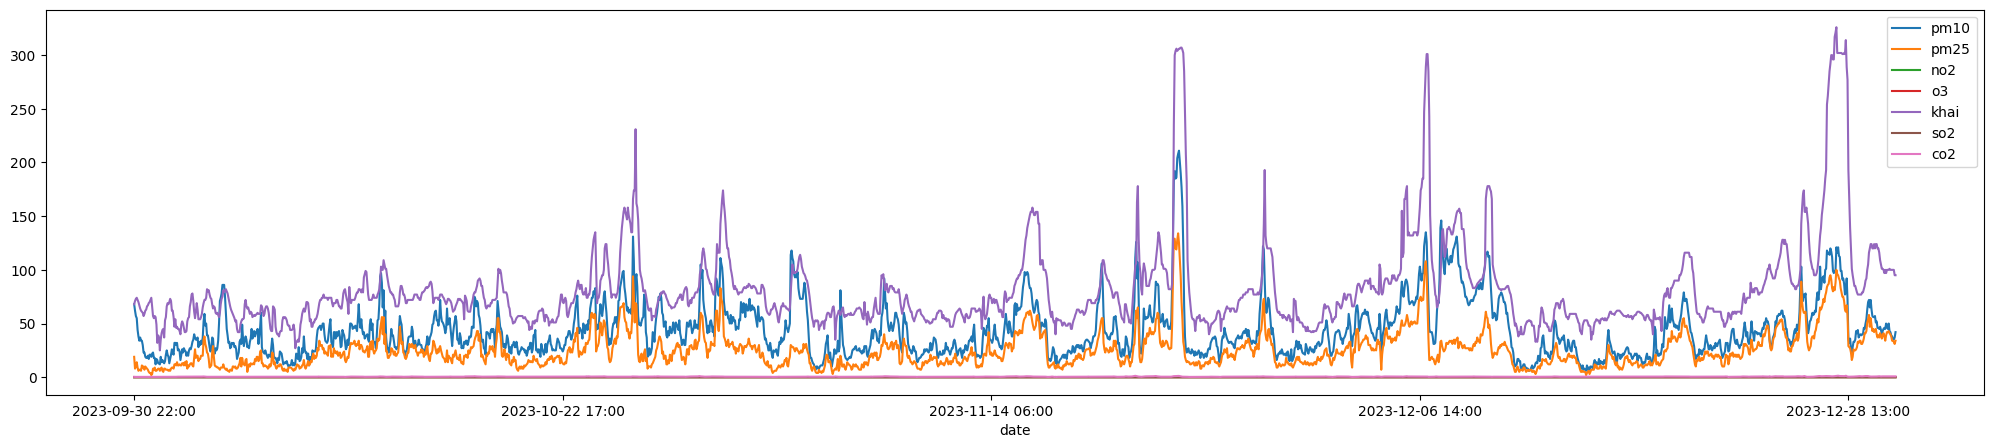

In [ ]:
df.plot(figsize=(25,5),fontsize=10)

위의 그래프는 pm10과 pm25만 수치가 뚜렷하므로, 정교화 작업을 통해 모든 수치를 비교할 수 있도록 해야한다

In [ ]:
# 정교화 작업
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_normalization = df

df_normalization[:] = scaler.fit_transform(df_normalization[:])

df_normalization

,pm10,pm25,no2,o3,khai,so2,co2
date,,,,,,,
2023-09-30 22:00,0.302439,0.128788,0.014925,0.556818,0.142857,0.222222,0.166667
2023-09-30 23:00,0.273171,0.045455,0.000000,0.545455,0.152824,0.222222,0.083333
2023-09-30 24:00,0.248780,0.060606,0.014925,0.511364,0.159468,0.222222,0.083333
2023-10-01 01:00,0.239024,0.090909,0.014925,0.500000,0.162791,0.222222,0.083333
2023-10-01 02:00,0.185366,0.053030,0.000000,0.534091,0.156146,0.222222,0.083333
...,...,...,...,...,...,...,...
2023-12-30 16:00,0.156098,0.242424,0.671642,0.125000,0.249169,0.111111,0.416667
2023-12-30 17:00,0.141463,0.242424,0.671642,0.102273,0.249169,0.111111,0.416667
2023-12-30 18:00,0.141463,0.234848,0.686567,0.056818,0.249169,0.111111,0.500000


<Axes: xlabel='date'>

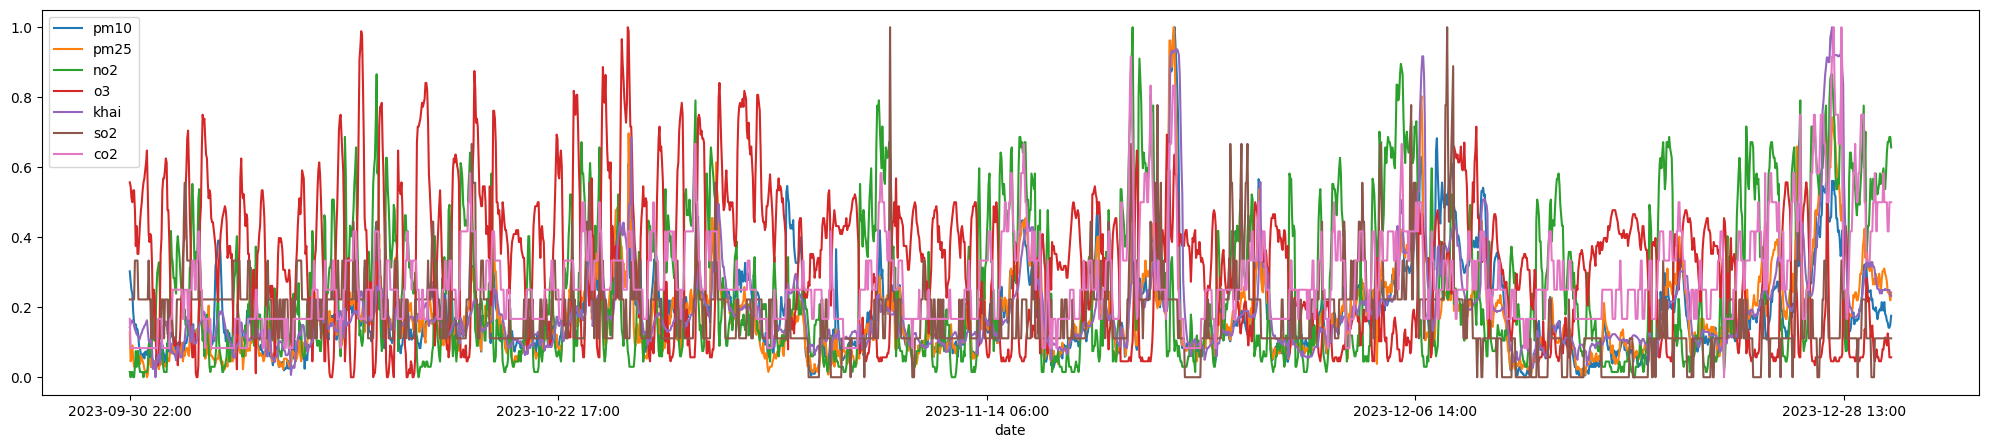

In [ ]:
df.plot(figsize=(25,5),fontsize=10)

In [ ]:
corr_normal = df_normalization.corr(method='pearson') #상관관계를 확인할 수 있다
corr_normal

,pm10,pm25,no2,o3,khai,so2,co2
pm10,1.000000,0.850598,0.364740,-0.017457,0.771598,0.352868,0.602995
pm25,0.850598,1.000000,0.488700,-0.134405,0.818700,0.267658,0.760307
no2,0.364740,0.488700,1.000000,-0.694758,0.303929,0.260150,0.726924
o3,-0.017457,-0.134405,-0.694758,1.000000,0.027025,-0.003972,-0.442215
khai,0.771598,0.818700,0.303929,0.027025,1.000000,0.203231,0.571629
so2,0.352868,0.267658,0.260150,-0.003972,0.203231,1.000000,0.165174
co2,0.602995,0.760307,0.726924,-0.442215,0.571629,0.165174,1.000000


위 표는 절댓값이 1에 가까울 수록 관계가 크고, 0에 가까울수록 적다!